In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# data
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore") 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *

# 일단 많이...

In [4]:
# colab에서 matplotlib 한글화할때
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe=fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',name='NanumGothic')
fm.fontManager.ttflist.insert(0,fe)
plt.rcParams.update({'font.size':18,'font.family':'NanumGothic'})
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
path = '/content/drive/MyDrive/ P - value/proj_3/데이터 파일/전처리데이터 (전후)/y_scaled.csv'

y_scaled = pd.read_csv(path)
y_scaled

,착과량(int)
0,692
1,534
2,634
3,639
4,496
...,...
2195,119
2196,611
2197,650
2198,363


In [6]:
path = '/content/drive/MyDrive/ P - value/proj_3/데이터 파일/전처리데이터 (전후)/X_scaled_date.csv'

X_scaled_date = pd.read_csv(path)
X_scaled_date

,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,-1.259189,-1.226165,-1.327204,-1.292671,-1.263844,-1.225557,-1.333939,-1.299658,-1.264833,-1.228785,...,0.493107,0.493068,0.475035,0.463176,0.454918,0.458172,0.471165,0.488043,0.489639,0.482688
1,-0.613180,-0.571607,-0.531966,-0.621661,-0.582393,-0.674661,-0.634176,-0.590167,-0.689255,-0.645669,...,0.630255,0.617483,0.609935,0.594229,0.584744,0.570276,0.545771,0.562327,0.585512,0.576981
2,-1.000786,-1.095253,-1.062125,-1.024267,-0.991263,-1.087833,-1.054034,-1.015862,-0.977044,-1.083006,...,0.567326,0.572509,0.582976,0.578021,0.576002,0.589960,0.573425,0.569907,0.550590,0.570106
3,-0.871584,-0.964342,-0.929585,-0.890065,-0.854973,-0.950109,-0.914082,-0.873964,-0.977044,-0.937227,...,0.236244,0.248754,0.263572,0.275122,0.295774,0.279781,0.265214,0.247313,0.261125,0.259612
4,-0.096373,-0.178873,-0.134347,-0.084852,-0.173522,-0.123764,-0.074366,-0.164473,-0.113677,-0.208331,...,-0.162870,-0.144729,-0.138858,-0.114603,-0.131793,-0.151464,-0.147424,-0.140505,-0.164526,-0.163311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,1.195646,1.130242,1.058510,1.122966,1.053090,1.115754,1.045255,1.112611,1.037480,1.103680,...,-0.646657,-0.634936,-0.634994,-0.614379,-0.606180,-0.606428,-0.610672,-0.623369,-0.635123,-0.617064
2196,-0.871584,-0.964342,-0.929585,-0.890065,-0.991263,-0.950109,-0.914082,-0.873964,-0.977044,-0.937227,...,1.098717,1.121997,1.126949,1.144149,1.153878,1.133607,1.153522,1.176881,1.172547,1.194432
2197,-1.000786,-0.964342,-1.062125,-1.024267,-0.991263,-0.950109,-1.054034,-1.015862,-0.977044,-0.937227,...,-0.344250,-0.361563,-0.339566,-0.351116,-0.358649,-0.379093,-0.403120,-0.417688,-0.409504,-0.391625
2198,0.162031,0.213862,0.130732,0.183552,0.235348,0.151684,0.205540,0.119323,0.174112,0.229006,...,-0.543533,-0.558886,-0.556849,-0.575524,-0.553643,-0.547454,-0.533822,-0.531357,-0.549640,-0.555354


In [7]:
path ='/content/drive/MyDrive/ P - value/proj_3/데이터 파일/전처리데이터 (전후)/X_scaled.csv'
X_scaled = pd.read_csv(path)
X_scaled

,수고(m),수관폭1(min),수관폭2(max),수관폭평균
0,0.869490,-0.426210,-0.971593,-0.733604
1,1.370746,-0.471461,-0.332135,-0.417362
2,1.565679,1.157576,1.324643,1.294972
3,1.259356,0.795568,0.292790,0.562216
4,1.732765,0.569313,-0.012406,0.284541
...,...,...,...,...
2195,-0.383651,0.569313,0.118392,0.353959
2196,0.618862,0.327974,0.597986,0.485084
2197,-0.188718,0.569313,0.045727,0.315393
2198,1.036575,0.327974,0.641585,0.508224


In [8]:
path ='/content/drive/MyDrive/ P - value/proj_3/데이터 파일/전처리데이터 (전후)/X_scaled_total.csv'
X_scaled_total = pd.read_csv(path)
X_scaled_total

,새순mean,새순std,새순diff,새순min,새순max,엽록소mean,엽록소std,엽록소diff,엽록소min,엽록소max
0,-1.348076,-1.228196,1.187680,0.808606,-1.259189,0.415442,-0.932766,0.938635,0.482688,0.362060
1,-0.852161,-0.245731,0.118096,-1.156704,-0.613180,0.615065,1.279782,-1.614464,0.576981,0.805248
2,-1.143098,-0.942796,0.895975,0.481054,-1.000786,0.557099,-0.652148,0.159998,0.570106,0.556750
3,-0.865386,-1.018714,0.993210,1.136158,-0.871584,0.264509,0.292666,0.007560,0.259612,0.262418
4,-0.075229,-0.231629,0.312566,0.808606,-0.096373,-0.157654,0.297098,-0.030569,-0.163311,-0.161562
...,...,...,...,...,...,...,...,...,...,...
2195,1.048844,1.111271,-1.243192,-1.156704,1.195646,-0.657356,-0.622193,0.626202,-0.617064,-0.711410
2196,-0.911671,-0.943146,0.895975,0.808606,-0.871584,1.184512,0.519057,-0.311042,1.194432,1.254410
2197,-1.119955,-0.901657,0.895975,0.481054,-1.000786,-0.324955,0.132369,-0.366973,-0.391625,-0.347461
2198,0.096688,0.239613,-0.465313,-1.156704,0.162031,-0.608616,-1.225151,0.930073,-0.555354,-0.690149


In [9]:
X_scaled_concat=pd.concat([X_scaled,X_scaled_total],axis=1)
X_scaled_concat.head()

,수고(m),수관폭1(min),수관폭2(max),수관폭평균,새순mean,새순std,새순diff,새순min,새순max,엽록소mean,엽록소std,엽록소diff,엽록소min,엽록소max
0,0.869490,-0.426210,-0.971593,-0.733604,-1.348076,-1.228196,1.187680,0.808606,-1.259189,0.415442,-0.932766,0.938635,0.482688,0.362060
1,1.370746,-0.471461,-0.332135,-0.417362,-0.852161,-0.245731,0.118096,-1.156704,-0.613180,0.615065,1.279782,-1.614464,0.576981,0.805248
2,1.565679,1.157576,1.324643,1.294972,-1.143098,-0.942796,0.895975,0.481054,-1.000786,0.557099,-0.652148,0.159998,0.570106,0.556750
3,1.259356,0.795568,0.292790,0.562216,-0.865386,-1.018714,0.993210,1.136158,-0.871584,0.264509,0.292666,0.007560,0.259612,0.262418
4,1.732765,0.569313,-0.012406,0.284541,-0.075229,-0.231629,0.312566,0.808606,-0.096373,-0.157654,0.297098,-0.030569,-0.163311,-0.161562


In [10]:
# RandomForestClassifier

In [11]:
# 1. 데이터 전처리
# X: 특성, y: 타깃
X = X_scaled_date
y = y_scaled

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
model_regressor = RandomForestRegressor(random_state=42)
model_regressor.fit(X_train, y_train)
y_pred = model_regressor.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
print("mse:", np.sqrt(mse)) # 38.113041057312174(mse 값이 작아야 모델의 예측이 정확하다고 하는데 그 기준을 모르겠음)

mse: 38.113041057312174


In [14]:
# 군집분석이라는 것을 해보려하였다.

In [15]:
X_scaled_concat.shape

(2200, 14)

In [16]:
X_scaled_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   수고(m)      2200 non-null   float64
 1   수관폭1(min)  2200 non-null   float64
 2   수관폭2(max)  2200 non-null   float64
 3   수관폭평균      2200 non-null   float64
 4   새순mean     2200 non-null   float64
 5   새순std      2200 non-null   float64
 6   새순diff     2200 non-null   float64
 7   새순min      2200 non-null   float64
 8   새순max      2200 non-null   float64
 9   엽록소mean    2200 non-null   float64
 10  엽록소std     2200 non-null   float64
 11  엽록소diff    2200 non-null   float64
 12  엽록소min     2200 non-null   float64
 13  엽록소max     2200 non-null   float64
dtypes: float64(14)
memory usage: 240.8 KB


In [17]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X_scaled_concat)
reduced_X.shape

(2200, 2)

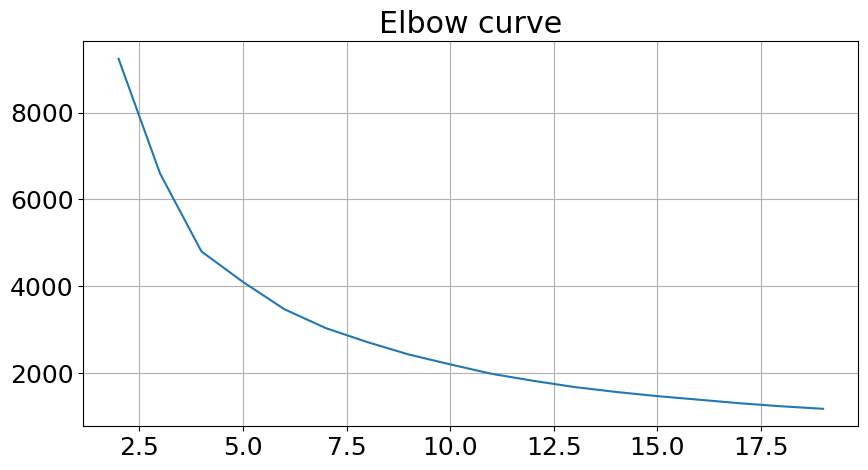

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_X)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

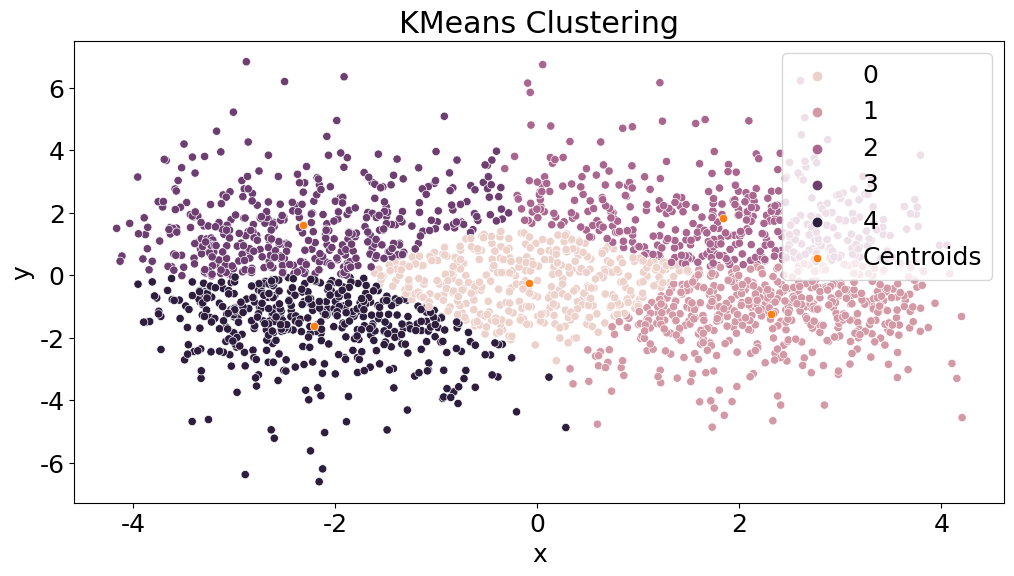

Silhouette Coefficient: 0.3536
Davies Bouldin Index: 0.8559


In [19]:
reduced_X = pd.DataFrame(reduced_X)

km = KMeans(n_clusters=5, init='k-means++') # 5에서... 해보기로 함
cluster = km.fit(reduced_X)
cluster_id = pd.DataFrame(cluster.labels_)

d1 = pd.concat([reduced_X, cluster_id], axis=1)
d1.columns = [0, 1, "cluster"]
centroid_df = pd.DataFrame(km.cluster_centers_, columns=[0, 1])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=d1, x=0, y=1, hue='cluster', legend="full")
sns.scatterplot(data=centroid_df, x=0, y=1, label='Centroids')
plt.title("KMeans Clustering")

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d1.iloc[:,:-1], d1['cluster']))) # 높을 수록 좋다고 함
print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d1.iloc[:,:-1], d1['cluster']))) # 낮을 수록 좋다고 함

Streaming output truncated to the last 5000 lines.


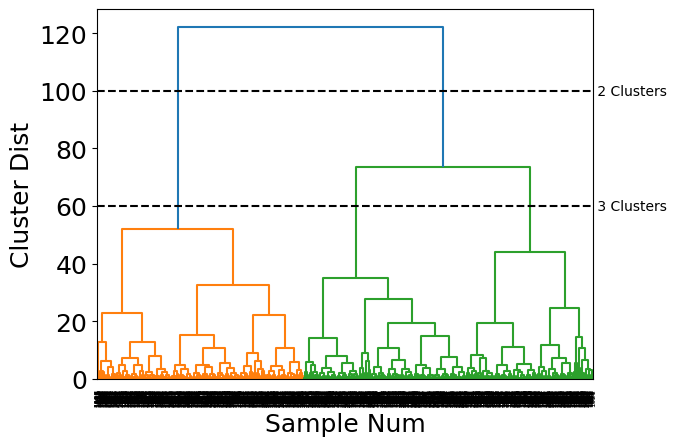

In [ ]:
linkage_array = ward(reduced_X)
dendrogram(linkage_array)
plt.xlabel("Sample Num")
plt.ylabel("Cluster Dist")

# 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [100, 100], '--', c='k')
ax.plot(bounds, [60, 60], '--', c='k')
ax.text(bounds[1], 100, ' 2 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 60, ' 3 Clusters ', va='center', fontdict={'size': 10})
plt.show()